In [1]:
from sklearn.datasets import load_iris
import numpy as np
iris=load_iris()
X=iris.data
y=iris.target

In [2]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_std=scaler.fit_transform(X)

In [3]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
X_pca=pca.fit_transform(X_std)

In [6]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,
         init='random',
         n_init=10,
         max_iter=300,
         tol=1e-04,
         random_state=0,
         )

y_km=km.fit_predict(X_pca[:,0:2])

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline

def kmeans_plot(n_clusters,km,X):
    y_km=km.fit_predict(X)
    
    for i,color,marker in zip(range(n_clusters),'rgbcm','>o+xv'):
         plt.scatter(X[y_km==i, 0],            # 横軸の値
                    X[y_km==i, 1],            # 縦軸の値
                    color=color,              # プロットの色
                    marker=marker,            # プロットの形
                    label='cluster ' + str(i) # ラベル
                   )
            
    plt.scatter(km.cluster_centers_[:, 0],    # 横軸の値
                km.cluster_centers_[:, 1],    # 縦軸の値
                color='y',                    # プロットの色
                marker='*',                   # プロットの形
                label='centroids',            # ラベル
                s=300,                        # プロットのサイズを大きくして見やすくする
               )
    
    plt.legend()
    plt.grid()
    plt.show()

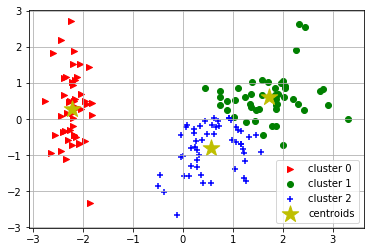

In [8]:
kmeans_plot(3,km,X_pca[:,0:2])